# tallaght map

Map of Tallaght areas and historical development

In [81]:
import os, glob
import pandas as pd
import numpy as np
import geopandas as gpd
import json
import matplotlib as mpl
import pylab as plt
import datetime, random
import subprocess
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 140)
import contextily as cx
from importlib import reload
import utils

In [344]:
cols = ['name','area','geometry','building','full_id','osm_id']
gdf = gpd.read_file('tallaght_buildings.shp')[cols]
roads = gpd.read_file('tallaght_roads.shp')
water = gpd.read_file('tallaght_water.shp')
#gdf = gdf.to_crs(epsg=3857)

In [345]:
gdf['area'].unique()

array(['Ballymount', 'Kingswood', None, 'Kilnamanagh', 'Belgard',
       'Citywest', 'Citywest Apts', 'Saggart Village', 'Saggart',
       'Cuil Duin', 'Carrigmore', 'Corbally/Verschoyle', 'Drury Mills',
       'Rathcoole Village', 'Rathcoole', 'Peyton', 'Broadfield',
       'Millrace', 'Cityest Apts', 'Citywest Village', 'Old Bawn',
       'Tallaght Main', 'Old Village', 'Balrothery', 'Tymon', 'Jobstown',
       'Whitestown', 'Roadstone', 'Hospital', 'SDCC', 'Belgard Square',
       'Glenview', 'Ballycullen', 'Knocklyon', 'Firhouse', 'Oldcourt',
       'Millbrook Lawns', 'Cookstown', 'Broomhill', 'Hibernian Ind Est',
       'Magna Park', 'Broomhill/Airton', 'Airton', 'Donomore Park',
       'Killinarden', 'Square', 'Aylesbury', 'St. Maelruns', 'Ard Mor',
       'Woodstown Village', 'Cushlawn', 'Deerpark', 'Brookfield',
       'Allenton', 'Glenshane', 'Suncroft/Sundale', 'Russell Square',
       'Fettercairn', 'Springfield', 'Ellensborough', 'The Belfry',
       'Marlfield', 'Alderpark

## assign years

In [346]:
yearmap = {'Old Bawn': 1972,
 'Balrothery': 1980,
 'Belgard Square': 2004,
 'Glenview': 1975,
 'Millbrook Lawns':1980,
 'Citywest' : 1998,
 'Magna Park' :2002,           
 'Killinarden': 1973,
 'Donomore Avenue':1980,
 'Donomore Park':1982,         
 'Fettercairn': 1976, 
 'Brookfield':1979,
 'Jobstown' : 1974,           
 'Ard Mor': 2003,
 'Glenshane': 2002,
 'Belgard': 1975,
 'Kingswood':1978,
 'Old Village':1950,
 'Tallaght Main':1999,
 'Cookstown':1970,
 'Kilnamanagh':1975,
 'Tymon': 1979,
 'Broomhill': 1984,
 'Airton':1970,
 'Hibernian Ind Est':1985,
 'Square': 1989,
 'Hospital': 1988,
 'Aylesbury' : 1977,
 'Cushlawn' : 1975,
 'Whitestown': 1978,
 'Deerpark': 2001,
 'Elder Heath': 2017,
 'Suncroft/Sundale' : 2002,
 'Russell Square': 2001,
 'Springfield': 1971,
 'Ellensborough' : 2002,
 'Allenton': 1983,
 'The Belfry' : 2003,
 'Marlfield': 2003,
 'Alderpark' : 1992,
 'Bancroft': 1964,
 'Raheen': 1974,
 'Virginia Heights' : 1980,
 'De Selby': 2002,
 'Newhall': 2002,
 'Old De Selby': 1975,
 'Citywest Village': 2020,
 'MacUilliam': 2004,
 'Carrigmore': 2005,
 'Corbally/Verschoyle': 2003,
 'Saggart':1975,
 'Saggart Village':1960,          
 'Rathcoole':1976,
 'Rathcoole Village':1960,
 'Peyton':2006,
 'Broadfield':2008,
 'Millrace':2005,
 'Drury Mills':2016,
 'Cuil Duin': 2018
 }
           
gdf['year'] = gdf['area'].map(yearmap)

In [347]:
roadyears={'M50':1986,'N81':1978,'R838':2004,'R114':1970,'N7':1960,'L2008':1960}
roads['year'] = roads['ref'].map(roadyears)

In [348]:
def random_date(year):

    if np.isnan(year):
        return
    year=int(year)
    start_date = datetime.date(year, 1, 1)
    end_date = datetime.date(year+1, 6, 30)

    time_between_dates = end_date - start_date
    days_between_dates = time_between_dates.days
    random_number_of_days = random.randrange(days_between_dates)
    random_date = start_date + datetime.timedelta(days=random_number_of_days)
    return random_date 

def add_dates(x): 
    return random_date(x.year)

gdf['date'] = gdf.apply(lambda x: add_dates(x),1)

In [349]:
def labels(gdf):
    ann=[]
    gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:][0])
    for idx, row in gdf.iterrows():
        a=plt.annotate(text=row['area'], xy=row['coords'],
                     fontsize=7,
                     bbox=dict(boxstyle="round4,pad=.5", fc="w"),
                     horizontalalignment='center')
        ann.append(a)
    return ann

/tmp/ipykernel_783123/978253493.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cent.geometry = areas.centroid


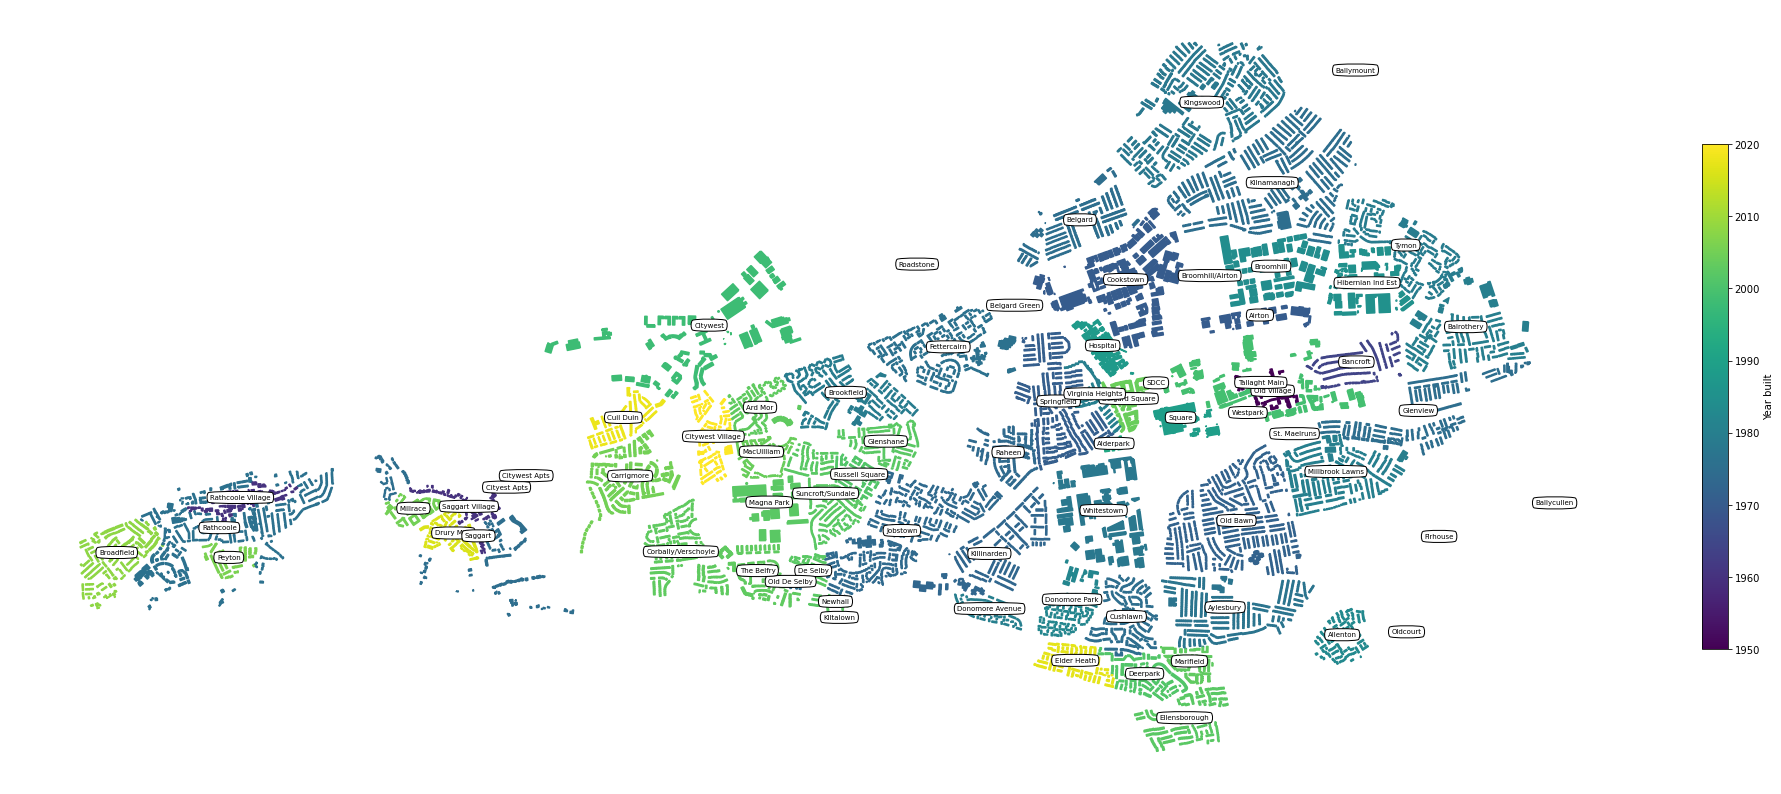

In [350]:
fig, ax = plt.subplots(1,1, figsize=(28,12))
areas = gdf.dissolve(by='area').reset_index()
blocks = areas.copy()
blocks.geometry = areas.boundary
cent = areas.copy()
cent.geometry = areas.centroid
areas.plot(column='year',ax=ax)
blocks.plot(column='year',ax=ax,legend=True,legend_kwds={'label': "Year built", "shrink": .6},)
#roads.plot(color='gray',ax=ax)

labels(cent)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('tallaght_areas.png',facecolor='white', transparent=False, dpi=200)

In [ ]:
reload(utils)
fig, ax = plt.subplots(1,1, figsize=(30,12))
gr = utils.create_grid(gdf, n_cells=80, overlap=True, crs="EPSG:4326")
ax.axis('off')
colors,nmap = utils.get_color_mapping(gr, 'area') 
gr['color'] = gr['area'].map(nmap)
gr.plot(color=gr.color,ec='gray',lw=.1,ax=ax)
labels(cent)

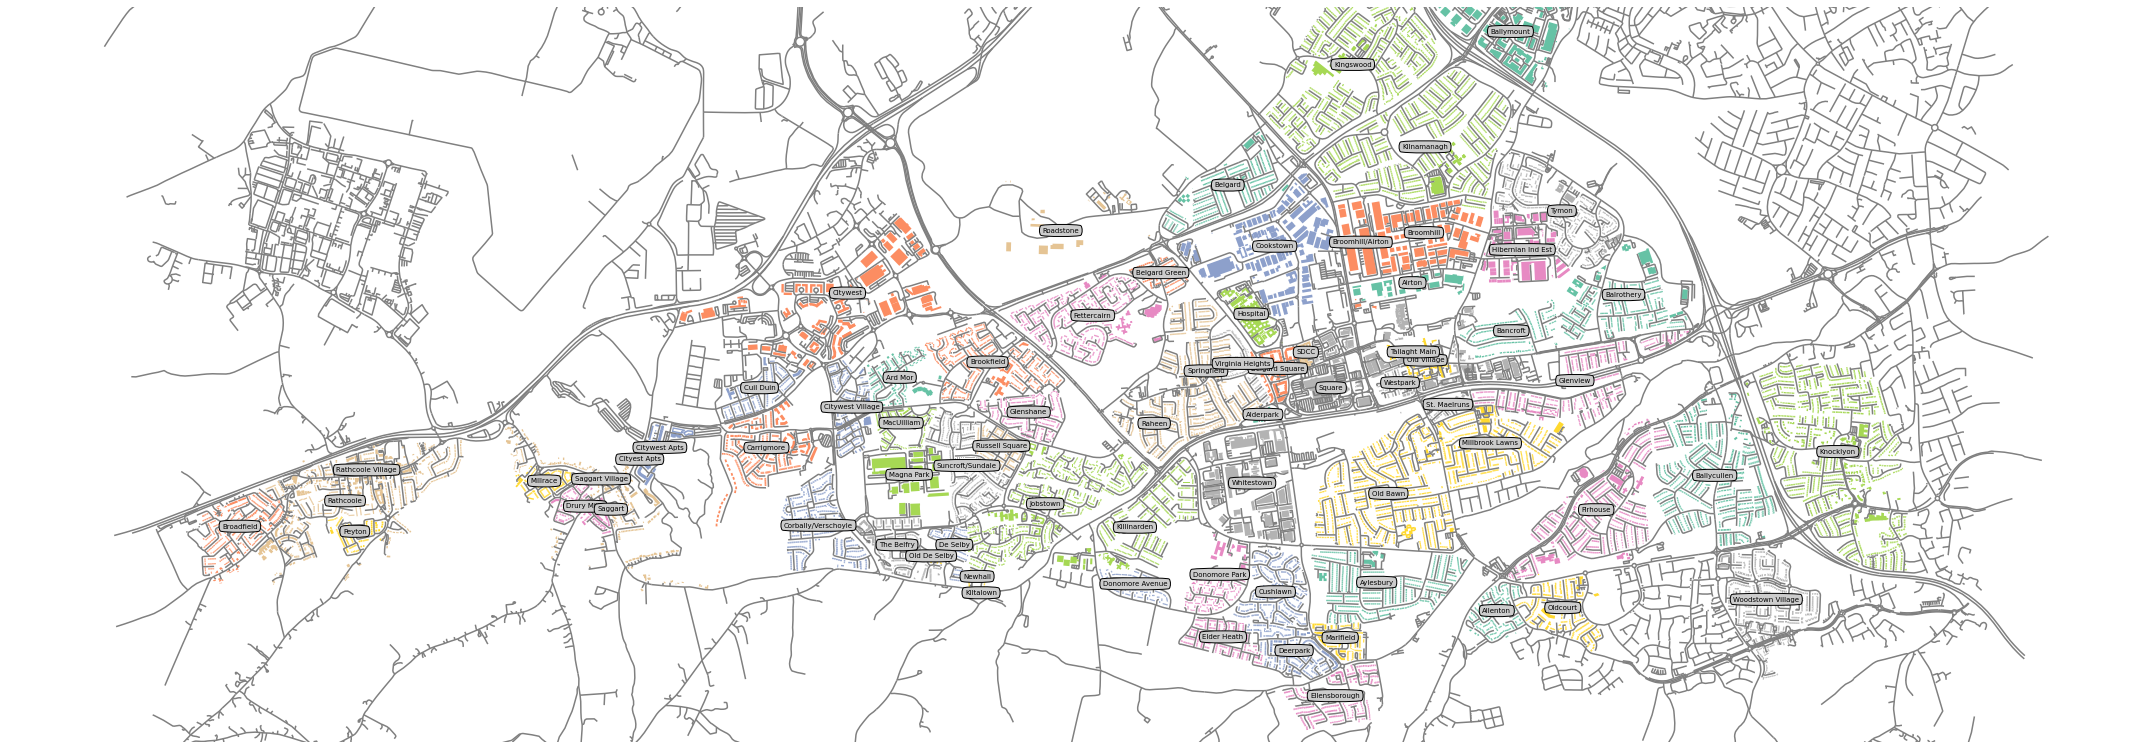

In [351]:
fig, ax = plt.subplots(1,1, figsize=(30,12))
gdf.plot(column='area',lw=.2,cmap='Set2',ax=ax)
roads.plot(color='gray',ax=ax)
for idx, row in cent.iterrows():
    plt.annotate(text=row['area'], xy=row['coords'],
                 fontsize=7,
                 bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
                 horizontalalignment='center')
ax.set_ylim(53.265,53.310)
ax.set_axis_off()
plt.tight_layout()
plt.savefig('tallaght_detailed.png',facecolor='white',dpi=200)    

In [72]:
list(gdf.columns)
gdf['area'].value_counts()

Knocklyon        1728
Kilnamanagh      1650
Kingswood        1452
Old Bawn         1428
Springfield      1421
                 ... 
Hospital           17
Alderpark          15
Magna Park         15
Citywest Apts      12
Kiltalown           8
Name: area, Length: 66, dtype: int64

In [342]:
dates = pd.date_range(start="1961-01-31",end="2022-12-31", periods=180).date

## Animate

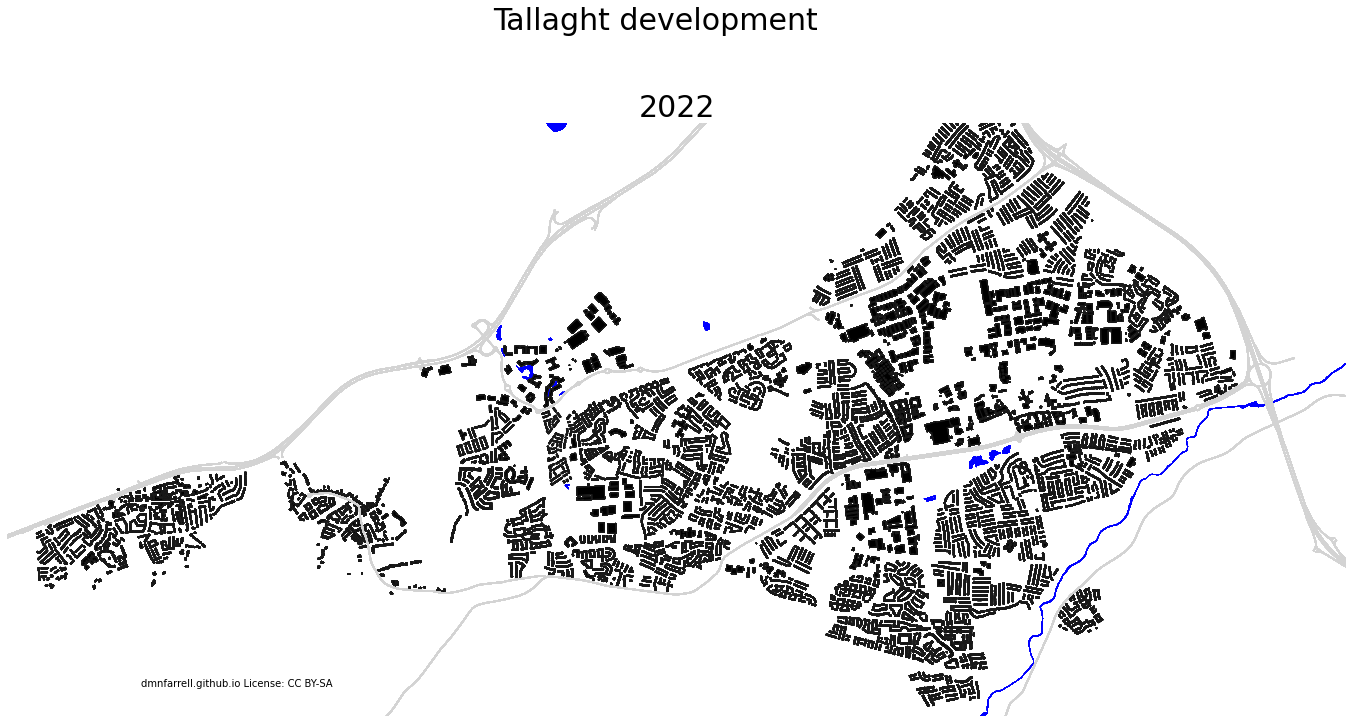

In [352]:
fig, ax = plt.subplots(1,1, figsize=(24,12))
fig.suptitle('Tallaght development', fontsize=30)
ax.text(x=.1,y=.05,s='dmnfarrell.github.io License: CC BY-SA',transform=ax.transAxes)
#draw background/rivers,main road
ann = None
filelist = glob.glob(os.path.join('anim', "*"))
for f in filelist:
    os.remove(f)
for date in dates:
    if ann != None:
        for a in ann:
            a.remove()
    sub = gdf[gdf.date<=date]
    sub.plot(color='black', figsize=(10,10), ec='0.1',ax=ax)
    sroads = roads[roads.year<=date.year]
    sroads.plot(color='lightgray',ax=ax)
    water.plot(color='blue',ax=ax)
    #label new areas
    new = cent[cent.year==date.year].copy()    
    ann = labels(new)

    ax.set_title(date.year,fontsize=30)
    ax.set_ylim(53.265,53.310)
    ax.set_xlim(-6.49,-6.32)
    ax.set_axis_off()    
    
    filepath = os.path.join('anim','%s.jpg' %date)   
    fig.savefig(filepath, dpi=80,bbox_inches='tight')
        
#cmd='convert -delay 100 anim/*.jpg tallaght_growth.gif'
cmd = 'ffmpeg -framerate 2 -pattern_type glob -i "anim/*.jpg" -c:v libx264 tallaght_growth.mp4'
#subprocess.check_output(cmd,shell=True)

In [ ]:
sub = gdf[gdf['area']=="Citywest"]
ax=sub.plot(color='black', figsize=(10,10))

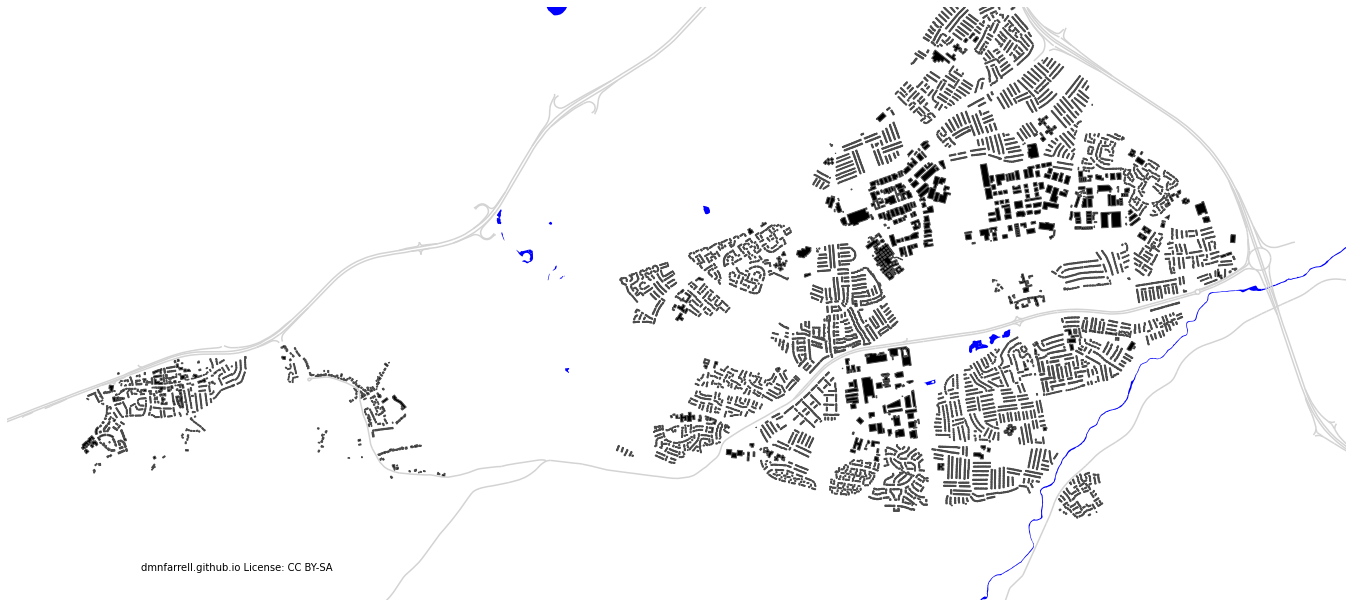

In [339]:
date = datetime.date(1989, 1, 1)
fig, ax = plt.subplots(1,1, figsize=(24,12))

sub = gdf[gdf.date<=date]
sub.plot(color='black', figsize=(10,10), ec='0.3',ax=ax)

sroads = roads[roads.year<=1989]
sroads.plot(color='lightgray',ax=ax)
water.plot(color='blue',ax=ax)
ax.set_ylim(53.265,53.310)
ax.set_xlim(-6.49,-6.32)
ax.set_axis_off()
ax.text(x=.1,y=.05,s='dmnfarrell.github.io License: CC BY-SA',transform=ax.transAxes)
#cx.add_basemap(ax,source=cx.providers.Esri.WorldShadedRelief, crs=gdf.crs, zoom=13)
fig.patch.set_visible(False)
#fig.savefig('test.png', dpi=80,bbox_inches='tight')